In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_scatter(x, title='Scatter Plot', x_label='X-axis', y_label='Y-axis'):
    # 绘制散点图
    plt.scatter(np.arange(len(x)),x,marker='o', s=2)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # # 设置X轴和Y轴范围
    # plt.xlim(0,5)  # 设置X轴范围
    plt.ylim(0, 5)  # 设置Y轴范围
    plt.show()

def plot_line(x, title='Scatter Plot', x_label='X-axis', y_label='Y-axis'):
    # 绘制散点图
    plt.plot(np.arange(len(x)),x, label='数据线', color='blue')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # 设置X轴和Y轴范围
    # plt.xlim(0,5)  # 设置X轴范围
    plt.ylim(0, 5)  # 设置Y轴范围
    plt.show()

def plot_step(data, title='Scatter Plot', x_label='X-axis', y_label='Y-axis',yrange=(-0.5,5.5)):

    # 创建阶梯状波形
    plt.step(range(len(data)), data,where='post')

    # 设置X轴标签
    plt.xlabel(x_label)

    # 设置Y轴标签
    plt.ylabel(y_label)

    # 设置标题
    plt.title(title)
    yd,yu=yrange
    plt.ylim(yd, yu)

    # 显示阶梯状波形
    plt.show()

def plot_step2(data1,data2, title='Scatter Plot', x_label='X-axis', y_label='Y-axis',label1='Beginning',label2='End',yrange=(-0.5,5.5)):
    ymin,ymax=yrange
    # 创建两个子图
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

    # 在第一个子图中绘制第一条曲线
    ax1.step(range(len(data1)), data1,where='post',label=label1,color='orange')
    ax1.set_ylabel('Voltage/V')
    ax1.set_ylim(ymin, ymax)  # 设置y轴范围为0到5
    # ax1.set_yticks(np.linspace(ymin, ymax, 5))  # 设置Y轴刻度值
    ax1.legend()

    # 在第二个子图中绘制第二条曲线
    ax2.step(range(len(data2)), data2,where='post',label=label2,color='blue')
    ax2.set_xlabel('Time/$t_d$')
    ax2.set_ylabel('Voltage/V')
    ax2.set_ylim(ymin, ymax)  # 设置y轴范围为0到5
    # ax2.set_yticks(np.linspace(ymin, ymax, 5))  # 设置Y轴刻度值
    ax2.legend()

    # 设置标题
    plt.suptitle('Theoretical Waveforms at the Beginning and End of a Coaxial Cable')

    # 调整子图之间的垂直间距
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.06)
    # 显示图形
    plt.show()


In [3]:
Z0=50.4
Zs=50.
Z1=1e6
u_sourse=5.

def reflectoin_coe(Z0,Zs,Z1):
    refl_s=(Zs-Z0)/(Zs+Z0)
    refl_1=(Z1-Z0)/(Z1+Z0)
    return refl_s,refl_1

reflectoin_coe(Z0,Zs,Z1)

(-0.003984063745019906, 0.9998992050800639)

In [4]:
def mydraw(Z0,Zs,Z1,u_sour=5,Nmax=10):
    us=np.zeros(Nmax)
    u1=np.zeros(Nmax)
    ur=us[0]=u_sour#*Z0/(Zs+Z0)
    uin=0
    refl_s,refl_1=reflectoin_coe(Z0,Zs,Z1)

    for i in range(1,Nmax):
        # print(i,end='')
        uin=ur
        if i%2:
            # print('奇数吗')
            ur=refl_1*uin
            us[i]=us[i-1]
            u1[i]=u1[i-1]+ur+uin
        else:
            # print('偶数吗')
            ur=refl_s*uin
            us[i]=us[i-1]+ur+uin
            u1[i]=u1[i-1]

        
    # plot_step(us,title='Beginning')
    # plot_step(u1,title='Endings')
    plot_step2(us,u1)

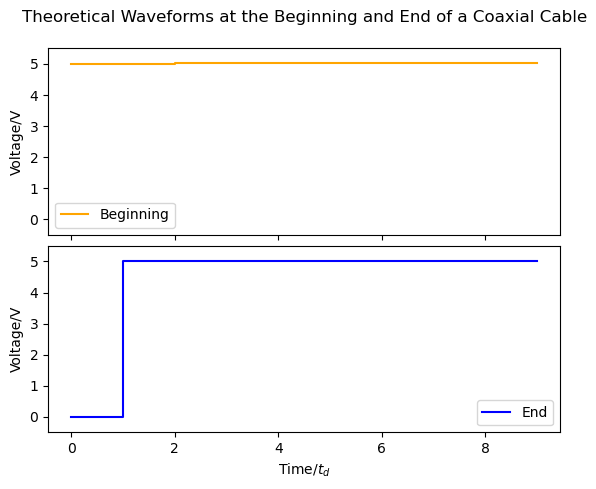

In [5]:
Z0=50.4
Zs=50.
Z1=51.
mydraw(Z0,Zs,Z1)